In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import h5py
import numpy as np

archivo_h5 = "/content/drive/MyDrive/w08b/Galaxy10.h5"

features = []
targets = []

with h5py.File(archivo_h5, 'r') as archivo:

    targets = np.asarray(archivo["ans"])
    features = np.asarray(archivo["images"])



In [3]:
print(features.shape,targets.shape)

(21785, 69, 69, 3) (21785,)


In [4]:
num_classes = len(set(targets))

In [5]:
new_targets = []

for x in targets:
    plantilla = [0 for x in range(num_classes)]
    plantilla[x] = 1
    new_targets.append(plantilla)

targets = np.asarray(new_targets)

In [6]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=60, test_size=0.25)
print(train_features.shape,test_features.shape)

(16338, 69, 69, 3) (5447, 69, 69, 3)


In [11]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=train_features[0].shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='selu'),
    tf.keras.layers.Dense(256, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(16, activation='selu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.categorical_crossentropy])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 67, 67, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 33, 33, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [12]:
epsilon = 1e-3
epocas = 20
mejor = 1e10
i = 0
while (mejor > epsilon) and (i < epocas):
  print(i)
  historial = model.fit(train_features, train_targets, epochs=5)
  if historial.history["loss"][-1] < mejor:
    model.save("/content/drive/MyDrive/w08b/red/clasificadorGalaxias")
    mejor = historial.history["loss"][-1]
  i+=1

0
Epoch 1/5
511/511 [==============================] - 6s 6ms/step - loss: 1.4812 - categorical_crossentropy: 1.4812
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.9513 - categorical_crossentropy: 0.9513
Epoch 3/5
511/511 [==============================] - 4s 7ms/step - loss: 0.8200 - categorical_crossentropy: 0.8200
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.7486 - categorical_crossentropy: 0.7486
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.6740 - categorical_crossentropy: 0.6740


1
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.6318 - categorical_crossentropy: 0.6318
Epoch 2/5
511/511 [==============================] - 4s 7ms/step - loss: 0.6031 - categorical_crossentropy: 0.6031
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.5552 - categorical_crossentropy: 0.5552
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.5262 - categorical_crossentropy: 0.5262
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.5022 - categorical_crossentropy: 0.5022


2
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.4691 - categorical_crossentropy: 0.4691
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.4952 - categorical_crossentropy: 0.4952
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.4381 - categorical_crossentropy: 0.4381
Epoch 4/5
511/511 [==============================] - 4s 8ms/step - loss: 0.4503 - categorical_crossentropy: 0.4503
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.4945 - categorical_crossentropy: 0.4945


3
Epoch 1/5
511/511 [==============================] - 4s 8ms/step - loss: 0.4345 - categorical_crossentropy: 0.4345
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.4229 - categorical_crossentropy: 0.4229
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.3393 - categorical_crossentropy: 0.3393
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.2869 - categorical_crossentropy: 0.2869
Epoch 5/5
511/511 [==============================] - 4s 7ms/step - loss: 0.2789 - categorical_crossentropy: 0.2789


4
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.7425 - categorical_crossentropy: 0.7425
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.5754 - categorical_crossentropy: 0.5754
Epoch 3/5
511/511 [==============================] - 3s 7ms/step - loss: 0.5349 - categorical_crossentropy: 0.5349
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.3892 - categorical_crossentropy: 0.3892
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.3835 - categorical_crossentropy: 0.3835
5
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.3476 - categorical_crossentropy: 0.3476
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.2889 - categorical_crossentropy: 0.2889
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.2066 - categorical_crossentropy: 0.2066
Epoch 4/5
511/511 [==============================] - 4s 7ms/step - loss: 0.1

6
Epoch 1/5
511/511 [==============================] - 4s 7ms/step - loss: 0.1648 - categorical_crossentropy: 0.1648
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1580 - categorical_crossentropy: 0.1580
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1342 - categorical_crossentropy: 0.1342
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1436 - categorical_crossentropy: 0.1436
Epoch 5/5
511/511 [==============================] - 3s 7ms/step - loss: 0.1996 - categorical_crossentropy: 0.1996
7
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1600 - categorical_crossentropy: 0.1600
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1045 - categorical_crossentropy: 0.1045
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0841 - categorical_crossentropy: 0.0841
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0

8
Epoch 1/5
511/511 [==============================] - 4s 7ms/step - loss: 0.0989 - categorical_crossentropy: 0.0989
Epoch 2/5
511/511 [==============================] - 3s 7ms/step - loss: 0.2748 - categorical_crossentropy: 0.2748
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0843 - categorical_crossentropy: 0.0843
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0555 - categorical_crossentropy: 0.0555
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1978 - categorical_crossentropy: 0.1978
9
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0908 - categorical_crossentropy: 0.0908
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0715 - categorical_crossentropy: 0.0715
Epoch 3/5
511/511 [==============================] - 4s 7ms/step - loss: 0.0586 - categorical_crossentropy: 0.0586
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1

10
Epoch 1/5
511/511 [==============================] - 3s 7ms/step - loss: 0.0867 - categorical_crossentropy: 0.0867
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.1870 - categorical_crossentropy: 0.1870
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0631 - categorical_crossentropy: 0.0631
Epoch 4/5
511/511 [==============================] - 4s 7ms/step - loss: 0.0402 - categorical_crossentropy: 0.0402
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0242 - categorical_crossentropy: 0.0242


11
Epoch 1/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0752 - categorical_crossentropy: 0.0752
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0626 - categorical_crossentropy: 0.0626
Epoch 3/5
511/511 [==============================] - 4s 8ms/step - loss: 0.0728 - categorical_crossentropy: 0.0728
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0685 - categorical_crossentropy: 0.0685
Epoch 5/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0589 - categorical_crossentropy: 0.0589
12
Epoch 1/5
511/511 [==============================] - 3s 7ms/step - loss: 0.0984 - categorical_crossentropy: 0.0984
Epoch 2/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0563 - categorical_crossentropy: 0.0563
Epoch 3/5
511/511 [==============================] - 3s 6ms/step - loss: 0.0385 - categorical_crossentropy: 0.0385
Epoch 4/5
511/511 [==============================] - 3s 6ms/step - loss: 0

KeyboardInterrupt: ignored

In [26]:
!cat /content/drive/MyDrive/w08b/log.txt | grep "loss:" | sed 's/.*loss: \([^ ]*\).*/\1/' > /content/drive/MyDrive/w08b/historial.txt

In [27]:
perdidas = np.loadtxt("/content/drive/MyDrive/w08b/historial.txt")

[]

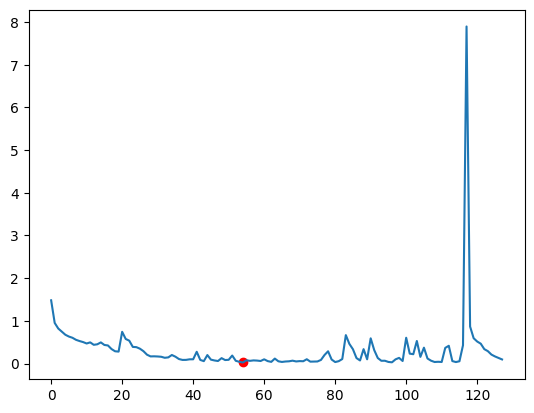

In [38]:
import matplotlib.pyplot as plt
indice = np.asarray(np.where(np.logical_and(perdidas <= mejor + 1e-4, perdidas >= mejor - 1e-4)))

plt.plot(perdidas)
plt.scatter(indice,mejor,c="r")
plt.plot()

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def dibujarMatriz(predicciones, test_targets):
    y_pred = []
    y_real = []
    for i in range(len(predicciones)):
        y_pred.append(np.argmax(predicciones[i]))
        y_real.append(np.argmax(test_targets[i]))

    cm = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[
            "DF-onNoS",
            "S-CR",
            "S-br",
            "S-C",
            "DE-onRB",
            "DE-onBB",
            "DE-onNB",
            "DF-onTS",
            "DF-onMS",
            "DF-onLS"
        ]
        )
    disp.plot(cmap='magma')

In [15]:
modelo = tf.keras.models.load_model("/content/drive/MyDrive/w08b/red/clasificadorGalaxias")

171/171 [==============================] - 1s 4ms/step


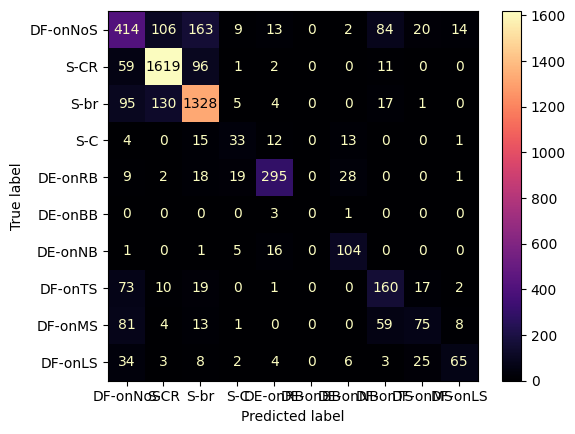

In [17]:
predicciones = modelo.predict(test_features)
dibujarMatriz(predicciones,test_targets)